## ``Fazendo o processo de clusterização sem tratamento prévio:``

- Tratamento prévio é o Ajuste de Escala;

- A primeira versão do estudo foi feita sem pré-processamento, para comparar com versão posterior utilizando pipeline com pré-processamento, PCA e K-Means;

- Assim, a versão deste notebook não deve ser considerada para análises mais profundas, pois não será uma segmentação ideal.

In [1]:
# Importando a biblioteca
import pandas as pd

# Definindo uma contante com o caminho para carregar o arquivo csv clusterizado
DADOS = "../dados/Mall_Customers_no_CustomerID_clustered.csv"

# Carregando o arquivo csv clusterizado e criando o DataFrame com os dados clusterizados
df_clustered = pd.read_csv(DADOS)

# Exibindo as 5 primeiras linhas do DataFrame
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


## Carregando o Modelo e os Clusters

In [2]:
# Importando a biblioteca
import joblib

# Carregando o Modelo na pasta modelos
kmeans = joblib.load("../modelos/kmeans.pkl")

# Vusualizando o resultado 
# Obs.: os labels_ são os números dos clusters, sendo de 0 a 5
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Observação:

- Os clusters apresentam um padrão, quando deveriam ser aleatórios, muito provavelmente devem receber uma grande influência da coluna da Renda Anual que deve ter sido ordenada.

## Obtendo as informações dos Centróides

In [3]:
# Informações dos centróides
# Obs.1: retornando uma array do numpy
# Obs.2: retornando 3 Colunas referentes às variáveis numéricas do DataFrame e 6 linhas referentes aos Clusters
kmeans.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [4]:
# Obtendo os nomes das coluas do DafaFrame
df_clustered.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

# Visualizando a Separação dos Clusters em um Gráfico 3D

- Criando um gráfico com os Centróides

#### Criando uma figura com um sistema de eixos com projeção em 3 Dimensões

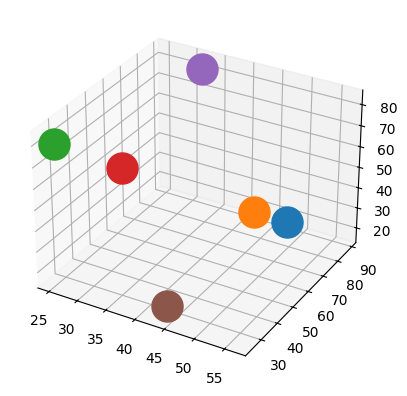

In [5]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Criando a figura
fig = plt.figure()

# Criando um sistema de eixos e adicionando um subplot à figura
# Obs.: passando o parâmentro 111, projection="3d" para gerar o gráfico 3D (ver documentação do matplotlib)
ax = fig.add_subplot(111, projection = "3d")

# Atribuindo os centróides à variável "centroids"
centroids = kmeans.cluster_centers_

# Percorrendo as variáveos "i" e "centroid" em enumerate(centroids)
for i, centroid in enumerate(centroids):
    # Definindo as coordenadas dos 6 centróides
    # x, y, z = centroid # fazendo o Unpacking Explícito
    # Colocando os pontos x, y e z no gráfico de dispersão
    # ax.scatter(x, y, z) # ou: 
    ax.scatter(*centroid, s = 500) # fazendo o Unpacking Implícito e alterando o tamanho dos pontos parâmetro s = 500

# Exibindo o gráfico
plt.show()

## 

## Criando uma Figura Completa com projeção em 3 Dimensões

In [6]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Criando uma função para a visualização dos clusters
# Obs.: passando os parâmetros para a função
def visualizar_clusters(
    dataframe,
    colunas,
    quantidade_cores,
    mostrar_centroids = True, 
    mostrar_pontos = False
):
    
    # Criando a figura
    fig = plt.figure()
    # Criando um sistema de eixos e adicionando um subplot à figura
    # Obs.: passando o parâmentro 111, projection="3d" para gerar o gráfico 3D (ver documentação do matplotlib)
    ax = fig.add_subplot(111, projection = "3d")
    # Atribuindo à variável "cores" a quantidade de cores a serem utilizadas do color map da paleta de cores tab10 do matplotlib
    # Obs.: funciona para qualquer quantidade de cores que for passada como parâmetro da função
    cores = plt.cm.tab10.colors[:quantidade_cores]
    # Sobreescrevendo a variável cores passando a variável cores original para o ListedColormap(cores)
    cores = ListedColormap(cores)
    # Atribuindo os centróides à variável "centroids"
    centroids = kmeans.cluster_centers_
    # Definindo a lista de colunas do DataFrame de acordo com os índices, colunas Age, Annual Income (k$) e Spending Score (1-100)
    x = dataframe[colunas[0]]
    y = dataframe[colunas[1]]
    z = dataframe[colunas[2]]
    
    # Mostrar os Centróides: usar parâmetro True
    ligar_centroids = mostrar_centroids
    # Mostrar os Pontos: usar parâmetro True
    ligar_pontos = mostrar_pontos
    
    # Percorrendo as variáveis "i" e "centroid" em enumerate(centroids)
    for i, centroid in enumerate(centroids):
        # Se for verdadeiro
        if ligar_centroids: 
            # Mostrando as coordenadas dos pontos x, y e z no gráfico de dispersão
            # Obs.: fazendo o Unpacking Implícito, passando o tamanho dos pontos no parâmetro s = 500 e alpha = 0.5
            ax.scatter(*centroid, s = 500, alpha = 0.5)
            # Mostrando nas coordenadas os números dos clusters
            # Obs.:passando os parâmetros tamanho da fonte e alinhamento horizontal/vertical
            ax.text(*centroid, f"{i}", fontsize = 20, horizontalalignment = "center", verticalalignment = "center")
        # Se for verdadeiro
        if ligar_pontos:
            # Mostrando todos os demais pontos e atribuindo à variável "s" (s de scatter)
            # Obs.1: definindo as cores no parâmetro c = dataframe["cluster"]
            # Obs.2: ajustando o mapa de cores no parâmetro cmap = cores
            s = ax.scatter(x, y, z, c = dataframe["cluster"], cmap = cores)
            # Passando os parãmetros de legenda do gráfico de dispersão
            # Obs.: ajustando a posição da legenda, fazendo a ancoragem de legenda para não sobrepor o gráfico: bbox_to_anchor = (1.3, 1)
            ax.legend(*s.legend_elements(), bbox_to_anchor = (1.35, 1))
    
    # Definindo o Rótulo dos Eixos x, y e z de acordo com os índices, sendo Age, Annual Income (k$) e Spending Score (1-100) respectivamente
    ax.set_xlabel(colunas[0])
    ax.set_ylabel(colunas[1])
    ax.set_zlabel(colunas[2])
    # Definindo o Título 
    ax.set_title("Clusters")
    # Exibindo o gráfico
    plt.show()

In [7]:
# Instalando a biblioteca ipympl 
# !pip install ipympl

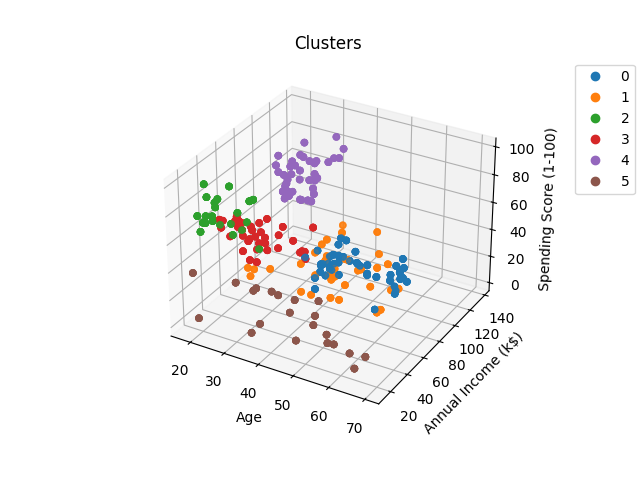

In [9]:
# Habilitando/desabilitando a interface interativa
# Obs.: É uma interface interativa do Matplotlib e funciona somente em uma célula do Jupyter
# %matplotlib ipympl

# Chamando a função e passando os parâmetros
visualizar_clusters(df_clustered, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 6, mostrar_pontos = True, mostrar_centroids = False)

##

- Nota-se que as regiões ou os centros estão bem separadas umas das outras;